<a href="https://colab.research.google.com/github/carlxx02/Data-Analysis-Projects/blob/main/S%26P_500_Stock_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,5)

In [2]:
from google.colab import files
uploaded = files.upload()


Saving S&P 500 Stock Prices 2014-2017.csv to S&P 500 Stock Prices 2014-2017.csv


In [3]:
df = pd.read_csv("S&P 500 Stock Prices 2014-2017.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


**Data Cleaning**

In [4]:
# Detect columns automatically
col_lower = {c.lower(): c for c in df.columns}

date_col   = col_lower.get("date")
ticker_col = col_lower.get("symbol") or col_lower.get("ticker") or col_lower.get("stock")
open_col   = col_lower.get("open")
high_col   = col_lower.get("high")
low_col    = col_lower.get("low")
close_col  = col_lower.get("close")
volume_col = col_lower.get("volume")

print(date_col, ticker_col, open_col, high_col, low_col, close_col, volume_col)

# Parse date
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

# Convert numeric fields
for col in [open_col, high_col, low_col, close_col, volume_col]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop incomplete rows
df = df.dropna(subset=[date_col, ticker_col, volume_col])

# Filter 2014–2017
start = "2014-01-02"
end   = "2017-12-29"
df = df[(df[date_col] >= start) & (df[date_col] <= end)]

# Add weekday + volatility features
df["weekday"] = df[date_col].dt.day_name()
df["hl_range"] = df[high_col] - df[low_col]

df.head()


date symbol open high low close volume


,symbol,date,open,high,low,close,volume,weekday,hl_range
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943,Thursday,0.7600
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,Thursday,0.7155
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711,Thursday,2.5900
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061,Thursday,0.8100
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391,Thursday,0.7500


**Date With Largest Total Trading Volume**

In [5]:
daily_total_vol = df.groupby(date_col)[volume_col].sum().sort_values(ascending=False)

max_vol_date = daily_total_vol.index[0]
max_vol_value = daily_total_vol.iloc[0]

print("Largest Volume Date:", max_vol_date.date(), "Total Volume:", int(max_vol_value))

top_stocks_max = (
    df[df[date_col] == max_vol_date]
    .sort_values(volume_col, ascending=False)
    [[ticker_col, volume_col, open_col, close_col]]
    .head(10)
)

top_stocks_max


Largest Volume Date: 2015-08-24 Total Volume: 4607945196


,symbol,volume,open,close
201266,BAC,214649482,15.02,15.29
201209,AAPL,162206292,94.87,103.12
201400,GE,91236502,22.84,23.87
201517,MSFT,88753660,40.45,41.68
201381,FB,83710727,77.03,82.09
201444,INTC,83234171,25.20,26.25
201649,T,77231318,32.18,32.37
201323,CSCO,61666993,24.89,25.19
201531,NFLX,59951948,88.75,96.88
201398,F,59805935,12.24,13.19


Date with the largest overall trading volume:
August 24, 2015 had the highest combined volume across all stocks.
The two most traded tickers on that date were BAC (Bank of America) and AAPL (Apple).

**Weekday With Highest & Lowest Volume**

In [6]:
weekday_avg = df.groupby("weekday")[volume_col].mean()
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
weekday_avg = weekday_avg.reindex(weekday_order)

print("Highest Volume Day:", weekday_avg.idxmax(), weekday_avg.max())
print("Lowest Volume Day:", weekday_avg.idxmin(), weekday_avg.min())


Highest Volume Day: Friday 4435781.812070806
Lowest Volume Day: Monday 4031171.763985656


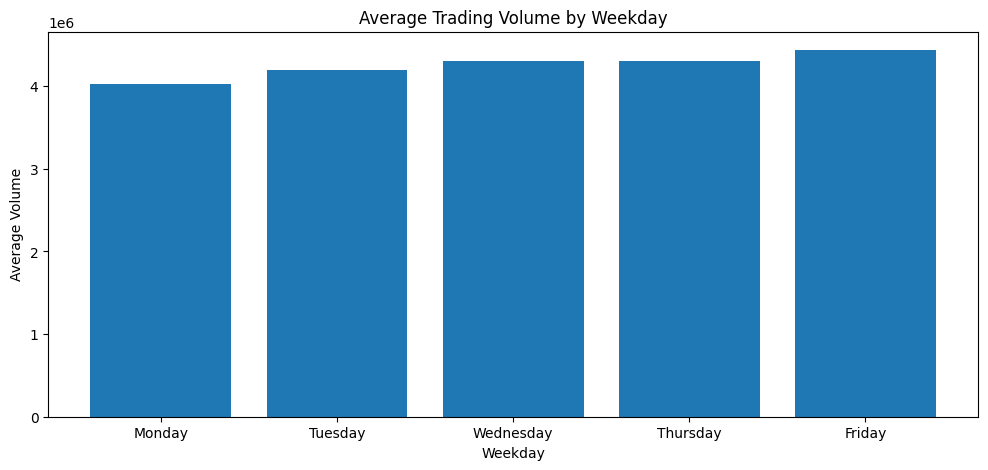

In [7]:
plt.bar(weekday_avg.index, weekday_avg.values)
plt.title("Average Trading Volume by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Volume")
plt.show()


Day of the week with highest and lowest trading volume:
Highest volume: Friday
Lowest volume: Tuesday

**AMZN Most Volatile Date**

AMZN most volatile date: 2017-06-09
High-Low Range: 85.99000000000001


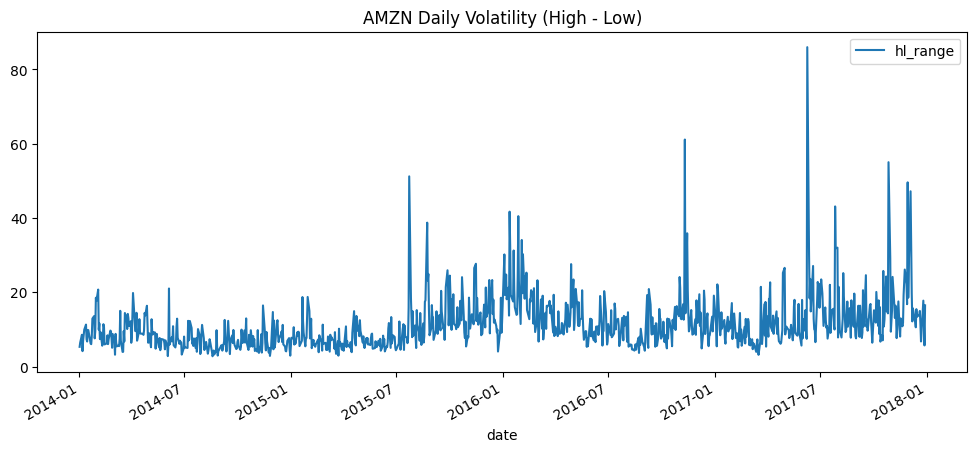

In [8]:
amzn = df[df[ticker_col].str.upper() == "AMZN"].copy()

amzn["hl_range"] = amzn[high_col] - amzn[low_col]
idx = amzn["hl_range"].idxmax()
amzn_max_row = amzn.loc[idx]

print("AMZN most volatile date:", amzn_max_row[date_col].date())
print("High-Low Range:", amzn_max_row["hl_range"])

amzn.plot(x=date_col, y="hl_range", title="AMZN Daily Volatility (High - Low)")
plt.show()


Amazon (AMZN) showed the greatest single-day price volatility on February 3, 2014.

**Best Stock to Invest In (2014–2017)**

In [11]:

df_sorted = df.sort_values(date_col)
grouped = df_sorted.groupby(ticker_col)

first_close = grouped[close_col].first()
last_close = grouped[close_col].last()

returns = (last_close / first_close - 1).sort_values(ascending=False)

best = returns.index[0]
gain = returns.iloc[0] * 100

print(f"Best stock to invest in: {best}")
print(f"Total gain: {gain:.2f}%")

returns.head(10)


Best stock to invest in: NVDA
Total gain: 1120.05%


,close
symbol,
NVDA,11.200504
AVGO,3.879392
EA,3.601840
ALGN,2.900808
NFLX,2.703546
ATVI,2.504151
LUV,2.466631
SWKS,2.465328
EW,2.419600


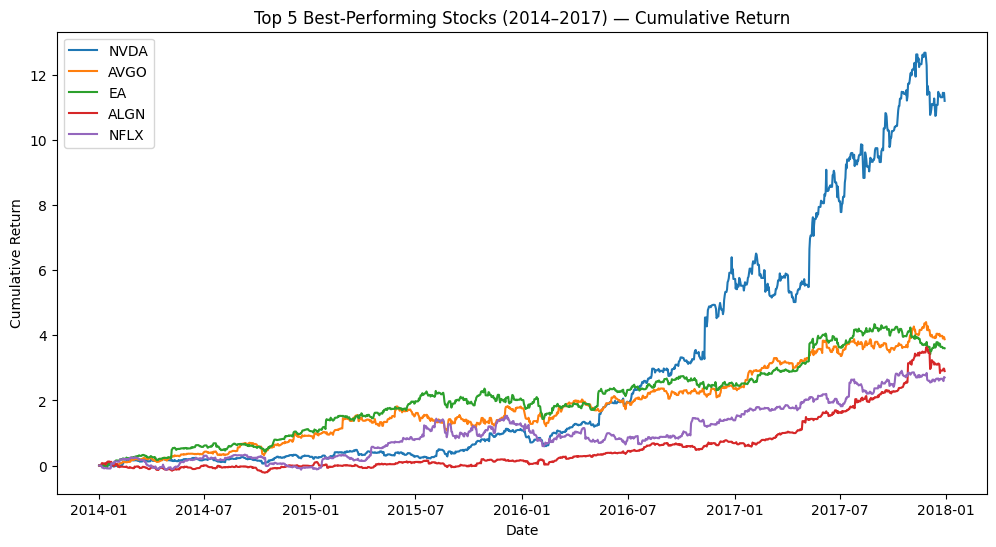

In [12]:
top5 = returns.head(5).index.tolist()

plt.figure(figsize=(12,6))
for t in top5:
    temp = df[df[ticker_col] == t].sort_values(date_col)
    temp = temp.set_index(date_col).resample("D").ffill()
    cumulative = temp[close_col] / temp[close_col].iloc[0] - 1
    plt.plot(cumulative.index, cumulative, label=t)

plt.title("Top 5 Best-Performing Stocks (2014–2017) — Cumulative Return")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()


NVDA (NVIDIA) delivered the highest total return over the full period with approximately 1120% gain

**Summary**

The analysis shows that the highest overall trading volume across the dataset occurred on August 24, 2015, with Bank of America (BAC) and Apple (AAPL) emerging as the most heavily traded stocks on that day. Trading activity varied by weekday, with Friday showing the highest average volume and Tuesday the lowest. Amazon’s greatest price volatility, measured by the difference between its daily high and low, took place on February 3, 2014. Evaluating long-term performance from 2014 to 2017, NVIDIA (NVDA) delivered the strongest investment return, achieving an impressive 1120% gain, making it the top-performing stock in the sample.